# k-Fold Cross Validation and Data Exploration


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Data Exploration

In [3]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [5]:
dataset.columns.values

array(['Age', 'EstimatedSalary', 'Purchased'], dtype=object)

In [6]:
dataset.shape#rows and columns

(400, 3)

In [7]:
dataset.info

<bound method DataFrame.info of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

In [8]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
dataset.dtypes


Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [10]:
dataset.memory_usage().sum()


9728

In [11]:
dataset.mean()


Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

In [12]:
dataset.memory_usage() # in bytes


Index               128
Age                3200
EstimatedSalary    3200
Purchased          3200
dtype: int64

In [13]:
dataset.var()

Age                1.098907e+02
EstimatedSalary    1.162603e+09
Purchased          2.302694e-01
dtype: float64

In [14]:
dataset.skew()

Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

In [15]:
dataset.kurtosis()

Age               -0.622513
EstimatedSalary   -0.405878
Purchased         -1.651992
dtype: float64

In [16]:
dataset.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [17]:
dataset.min()

Age                   18
EstimatedSalary    15000
Purchased              0
dtype: int64

In [18]:
dataset.max()

Age                    60
EstimatedSalary    150000
Purchased               1
dtype: int64

In [19]:
dataset.median()

Age                   37.0
EstimatedSalary    70000.0
Purchased              0.0
dtype: float64

In [20]:
age = dataset['Age'].unique()
age

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54])

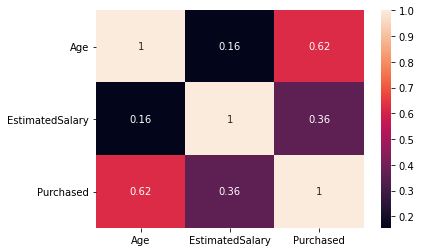

In [21]:
sns.heatmap(dataset.corr(), annot=True)


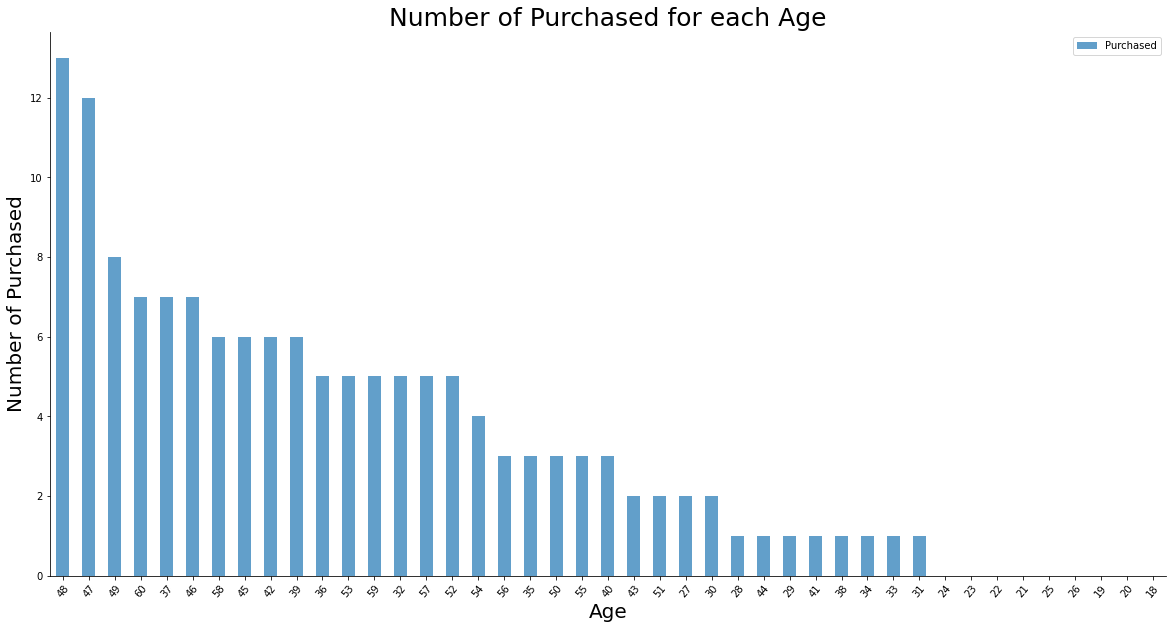

In [22]:
newdata = dataset[['Age','Purchased']].groupby(['Age']).sum().sort_values('Purchased',axis = 0,ascending = False)
fig, ax4 = plt.subplots(figsize=(20,10))
newdata.plot(kind = 'bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title('Number of Purchased for each Age',fontsize = 25)
plt.xlabel('Age',fontsize = 20)
plt.ylabel('Number of Purchased',fontsize = 20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

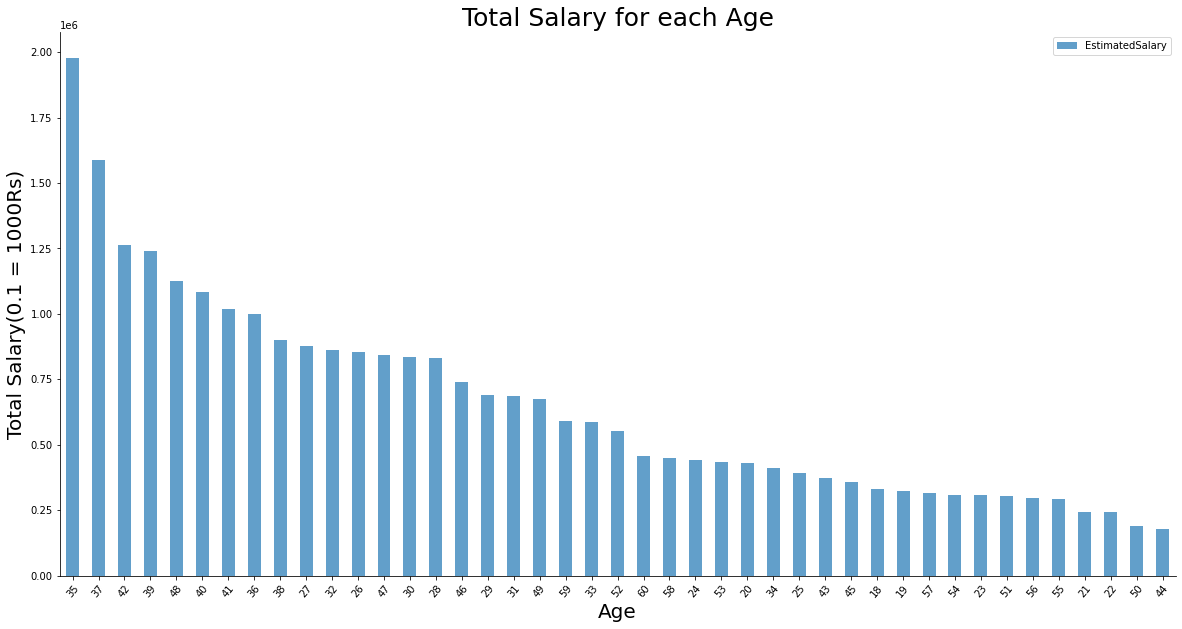

In [23]:
new_data = dataset[['Age','EstimatedSalary']].groupby(['Age']).sum().sort_values('EstimatedSalary',axis = 0,ascending = False)
fig, ax4 = plt.subplots(figsize=(20,10))
new_data.plot(kind = 'bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title('Total Salary for each Age',fontsize = 25)
plt.xlabel('Age',fontsize = 20)
plt.ylabel('Total Salary(0.1 = 1000Rs)',fontsize = 20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

In [24]:
Max_Purchased=newdata.iloc[0]
Max_Purchased


Purchased    13
Name: 48, dtype: int64

In [25]:
Max_salary = new_data.iloc[0]
Max_salary

EstimatedSalary    1978000
Name: 35, dtype: int64

<p>The maximum number of Purchasing for a particular age is<strong> 13</strong>
<p>The maximum number of Salary for a Particular age is<strong> Rs 19,788,000 Rs

#K-Fold Validation

## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernal SVM model on the Training set(Shows high Accuracy)

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Making the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Applying k-Fold Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


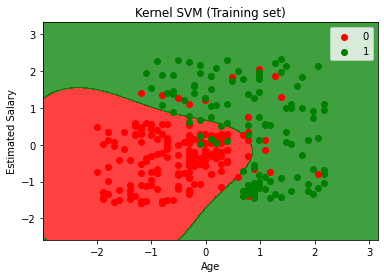

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


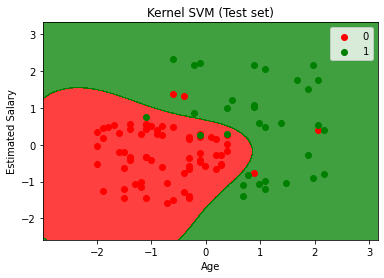

In [32]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()